# library

In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))

# dataset

In [5]:
df = pd.read_csv('data/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# data understanding

In [6]:
df.shape

(252, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [9]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [10]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [11]:
df.duplicated().sum()

0

# eda

Text(0.5, 0.98, 'Visualizing Continuous Columns')

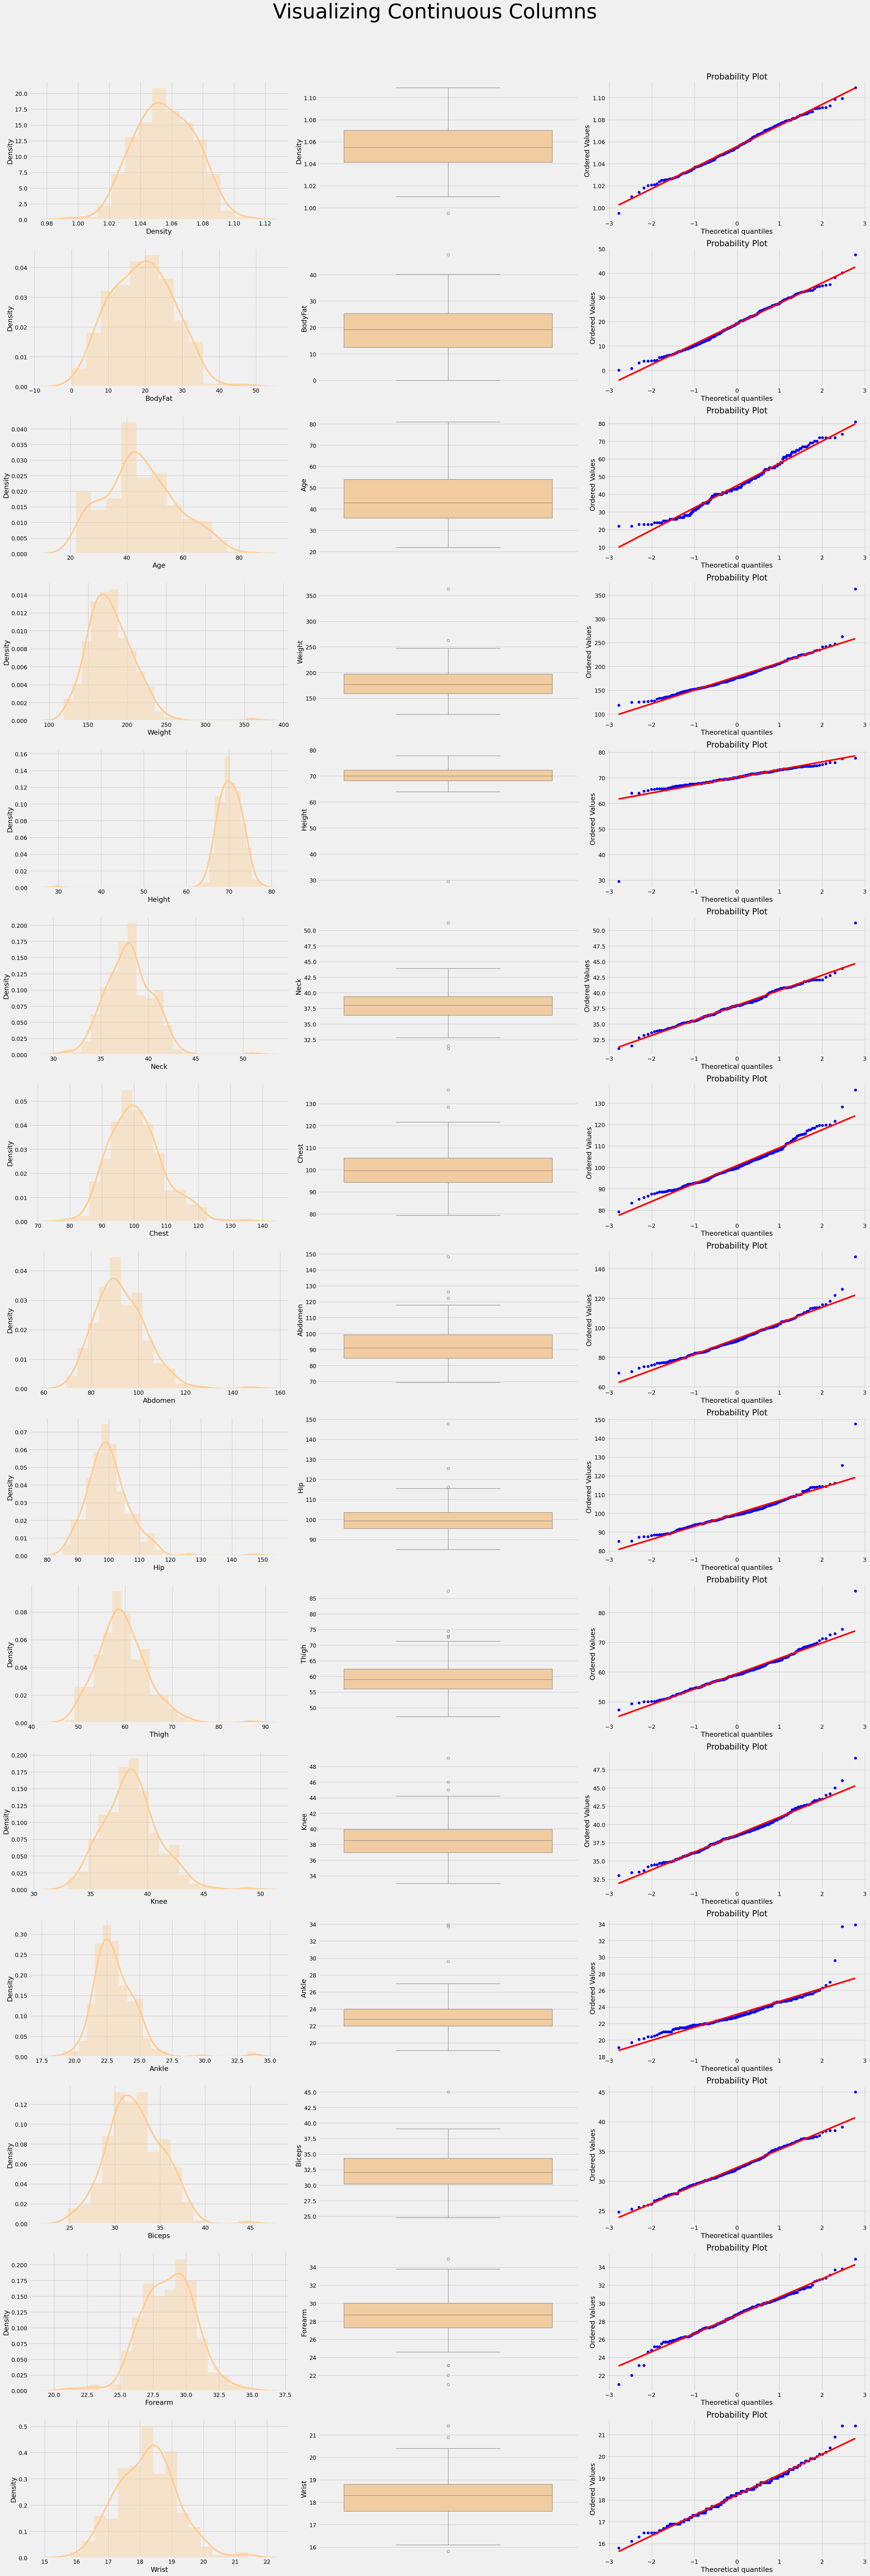

In [12]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

In [13]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64


<AxesSubplot: >

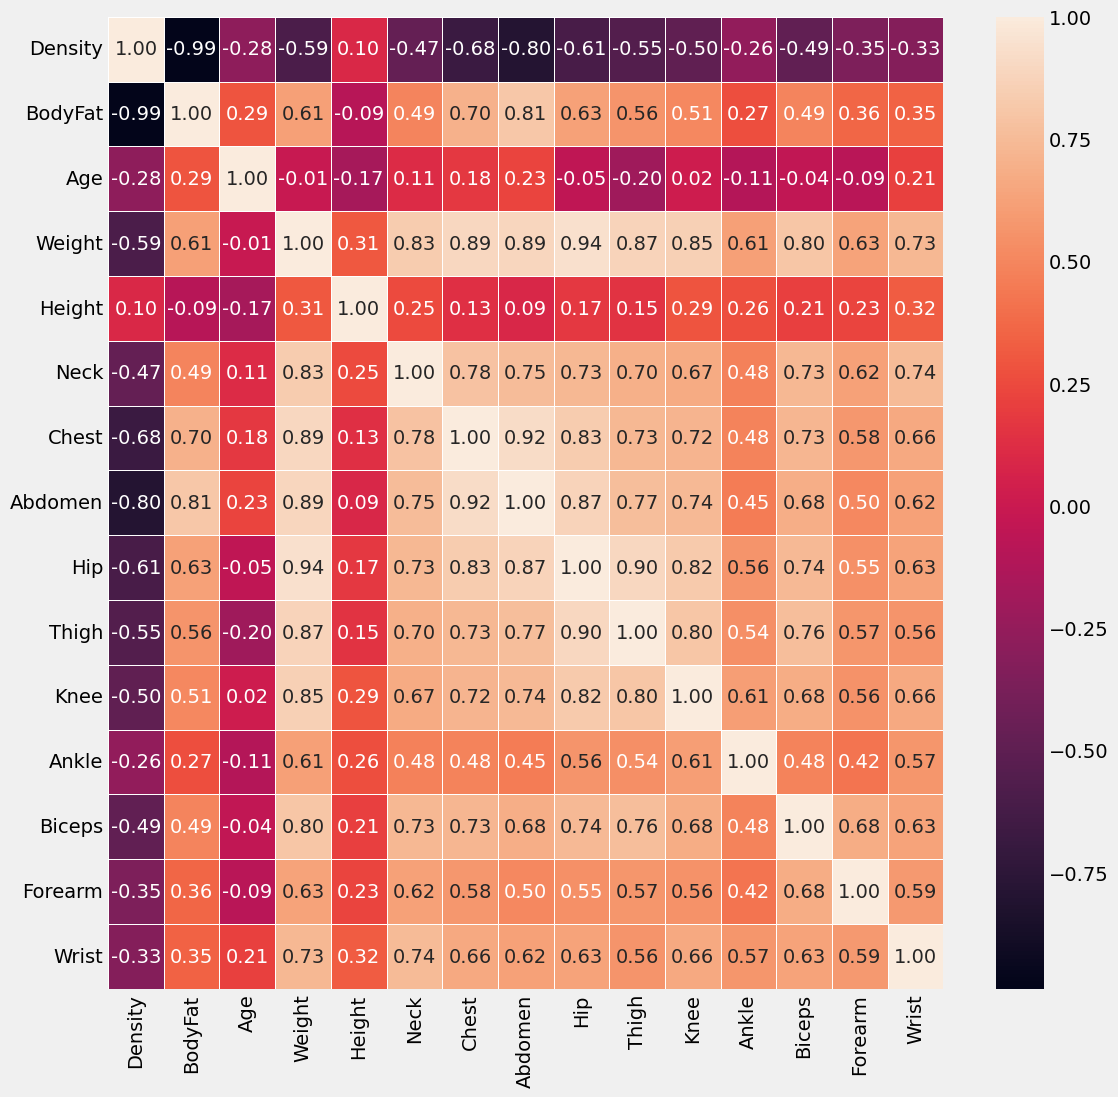

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

# bagi ke X y

In [15]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['Density']

# fitur baru

In [16]:
X['Bmi']=703*X['Weight']/(X['Height']*X['Height'])
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [17]:
X['ACratio'] = X['Abdomen']/X['Chest']
X['HTratio'] = X['Hip']/X['Thigh']
X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342


## train test

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=42)

# model

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Inisialisasi model-model yang ingin dievaluasi
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SGD Regressor': SGDRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Random Forest': RandomForestRegressor(),
    'Kernel Ridge': KernelRidge(),
    'LGBM Regressor': LGBMRegressor()
}

# Dictionary untuk menyimpan hasil
results = {}

# Fungsi untuk menghitung metrik
def compute(model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = (r2, rmse)

# Loop melalui setiap model dalam dictionary
for name, model in models.items():
    compute(name, model)

# Mengubah hasil menjadi DataFrame
score_df = pd.DataFrame(results, index=['R2_score', 'RMSE']).transpose()
score_df = score_df.sort_values(by='R2_score', ascending=False)

# Tampilkan hasil
print(score_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 10
[LightGBM] [Info] Start training from score 1.055084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

## pilih model yang terbaik

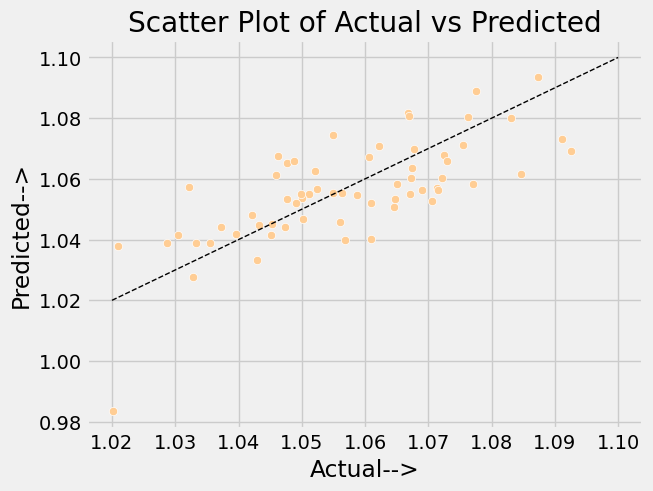

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot dengan sns.scatterplot menggunakan keyword arguments
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([1.02, 1.10], [1.02, 1.10], color='black', linestyle='--', linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Scatter Plot of Actual vs Predicted")
plt.show()


# prediksi bodyfat

👉 | Predicting Fat Percentage

Many body composition equations derive their measure of percent body fat from first determining body density. Once body density is determined, percent bodyfat (%BF) can be calculated using the Siri equation below :

% Body Fat = (495 / Body Density) - 450

In [25]:
def predict(values):
    density = linear.predict(values)
    fat = ((4.95/density[0]) - 4.5)*100
    print(f'Density: {density[0]} g/cc\nPercentage Body Fat: {fat} %\n')

In [28]:
predict(X_test.iloc[2].values.reshape(1,-1))

Density: 1.0387702208164313 g/cc
Percentage Body Fat: 26.525019759374757 %



In [32]:
# Mengambil nama model terbaik berdasarkan R2_score
best_model_name = score_df.index[0]
best_model = models[best_model_name]

# Latih kembali model terbaik pada data pelatihan
best_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji menggunakan model terbaik
y_pred_best = best_model.predict(X_test)

# Buat DataFrame untuk membandingkan hasil prediksi dengan nilai aktual
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best
})

# Tentukan apakah prediksi benar atau salah berdasarkan toleransi tertentu (misalnya 2.0)
tolerance = 2.0
comparison_df['Difference'] = abs(comparison_df['Actual'] - comparison_df['Predicted'])
comparison_df['Correct'] = comparison_df['Difference'] <= tolerance

# Tampilkan hasil
print(f"Model terbaik: {best_model_name}")
print(comparison_df)


Model terbaik: Random Forest
     Actual  Predicted  Difference  Correct
165  1.0549   1.064513    0.009613     True
6    1.0549   1.064190    0.009290     True
111  1.0355   1.041890    0.006390     True
172  1.0521   1.058691    0.006591     True
115  1.0607   1.068263    0.007563     True
..      ...        ...         ...      ...
193  1.0429   1.036040    0.006860     True
249  1.0328   1.026359    0.006441     True
170  1.0926   1.070013    0.022587     True
126  1.0373   1.046497    0.009197     True
97   1.0730   1.061720    0.011280     True

[63 rows x 4 columns]


In [36]:
# Fungsi untuk menghitung Body Fat Percentage dari nilai density
def calculate_body_fat(density):
    return ((4.95 / density) - 4.5) * 100

# Mengambil model terbaik berdasarkan R2_score tertinggi
best_model_name = score_df.index[0]
best_model = models[best_model_name]

# Latih model terbaik pada data pelatihan
best_model.fit(X_train, y_train)

# Prediksi density pada data uji menggunakan model terbaik
predicted_density = best_model.predict(X_test)

# Hitung Body Fat Percentage dari nilai density yang diprediksi
predicted_body_fat = [calculate_body_fat(d) for d in predicted_density]

# Jika data body fat aktual tersedia di y_test, bandingkan dengan prediksi
# Asumsikan bahwa `y_test` berisi nilai body fat percentage yang sebenarnya
comparison_df = pd.DataFrame({
    'Actual Body Fat (%)': df.loc[y_test.index, 'BodyFat'],  # Pastikan y_test adalah body fat percentage
    'Predicted Body Fat (%)': predicted_body_fat
})

# Tentukan apakah prediksi benar atau salah berdasarkan toleransi tertentu (misalnya 2.0)
tolerance = 2.0
comparison_df['Difference'] = abs(comparison_df['Actual Body Fat (%)'] - comparison_df['Predicted Body Fat (%)'])
comparison_df['Correct'] = comparison_df['Difference'] <= tolerance

# Tampilkan hasil
print(f"Model terbaik: {best_model_name}")
print(comparison_df)


Model terbaik: Random Forest
     Actual Body Fat (%)  Predicted Body Fat (%)  Difference  Correct
165                 19.2               15.160861    4.039139    False
6                   19.2               14.743785    4.456215    False
111                 28.0               24.332389    3.667611    False
172                 20.5               17.961644    2.538356    False
115                 16.7               12.373104    4.326896    False
..                   ...                     ...         ...      ...
193                 24.7               25.901593    1.201593     True
249                 29.3               31.524536    2.224536    False
170                  3.0               12.156394    9.156394    False
126                 27.2               23.607164    3.592836    False
97                  11.3               16.682631    5.382631    False

[63 rows x 4 columns]


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Menghitung MAE, RMSE, dan R-squared untuk prediksi body fat
mae = mean_absolute_error(comparison_df['Actual Body Fat (%)'], comparison_df['Predicted Body Fat (%)'])
rmse = np.sqrt(mean_squared_error(comparison_df['Actual Body Fat (%)'], comparison_df['Predicted Body Fat (%)']))
r2 = r2_score(comparison_df['Actual Body Fat (%)'], comparison_df['Predicted Body Fat (%)'])

# Tampilkan hasil akurasi
print("Akurasi Prediksi Body Fat Percentage:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Akurasi Prediksi Body Fat Percentage:
Mean Absolute Error (MAE): 3.82
Root Mean Squared Error (RMSE): 4.55
R-squared (R²): 0.62
